In [ ]:
!pip install sktime
!pip install git+https://github.com/manu-mannattil/nolitsa.git
!pip install giotto-tda 
!pip install scikit-learn
!pip install -U giotto-tda
!pip install ripser
!pip install kmapper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.0/118.0 kB 5.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/manu-mannattil/nolitsa.git to /tmp/pip-req-build-abnup1yy
  Running command git clone --filter=blob:none --quiet https://github.com/manu-mannattil/nolitsa.git /tmp/pip-req-build-abnup1yy
  Resolved https://github.com/manu-mannattil/nolitsa.git to commit 0e3cfd59c82c21c42da55cd24ee944b44aa0d9ad
  Preparing metadata (setup.py) ... done
  Created wheel for nolitsa: filename=nolitsa-0.1-py3-none-any.whl size=22185 sha256=0356f29866c54333b5d7bdb7dd88686d3c03a9b99c426729d942acbcd5b63309
  Stored in directory: /tmp/pip-ephem-wheel-cache-hxd56ss1/wheels/0e/f4/40/d6094caec491124c7302bf2741c9d0d9897bb655c18750e12c

In [ ]:
import numpy as np
import pandas as pd 
import pickle
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from gtda.time_series import SingleTakensEmbedding, takens_embedding_optimal_parameters
from sklearn.decomposition import PCA
from gtda.plotting import plot_point_cloud
from nolitsa import dimension, delay
import ripser
import persim
import kmapper as km
from kmapper.jupyter import display

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/EA2/sstoi.indices.csv')
df

,YR M,ON N,INO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM NI,NO3.4,ANOM.2
0,1982,1,24.28,-0.24,25.84,0.17,28.01,-0.21,26.65,0.08
1,1982,2,25.38,-0.72,26.26,-0.11,27.99,-0.11,26.54,-0.20
2,1982,3,25.22,-1.38,26.92,-0.25,28.18,-0.05,27.09,-0.14
3,1982,4,24.57,-1.16,27.52,-0.05,28.61,0.10,27.83,0.02
4,1982,5,24.00,-0.62,27.70,0.49,29.19,0.40,28.37,0.49
...,...,...,...,...,...,...,...,...,...,...
491,2022,12,22.54,-0.30,24.48,-0.78,27.71,-0.73,25.81,-0.84
492,2023,1,24.27,-0.24,25.17,-0.50,27.62,-0.60,25.88,-0.69
493,2023,2,26.80,0.71,26.25,-0.13,27.58,-0.52,26.29,-0.44
494,2023,3,28.12,1.52,27.52,0.36,28.09,-0.14,27.23,-0.01


In [ ]:
df.describe()

,YR M,ON N,INO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM NI,NO3.4,ANOM.2
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,2002.169355,6.467742,23.238569,-0.059435,25.959617,-0.070262,28.448306,-0.103266,27.010464,-0.082903
std,11.945142,3.461617,2.325709,1.037774,1.229778,0.852488,0.678358,0.634563,0.942563,0.830024
min,1982.000000,1.000000,19.060000,-1.900000,23.380000,-2.160000,26.360000,-1.870000,24.560000,-2.220000
25%,1992.000000,3.000000,21.217500,-0.742500,24.980000,-0.652500,27.997500,-0.570000,26.337500,-0.670000
50%,2002.000000,6.000000,23.125000,-0.250000,25.930000,-0.170000,28.555000,-0.020000,27.050000,-0.115000
75%,2012.250000,9.000000,25.222500,0.440000,26.872500,0.402500,28.970000,0.370000,27.682500,0.440000
max,2023.000000,12.000000,28.510000,4.030000,28.810000,3.070000,30.220000,1.550000,29.540000,2.720000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YR M     496 non-null    int64  
 1   ON  N    496 non-null    int64  
 2   INO1+2   496 non-null    float64
 3   ANOM     496 non-null    float64
 4   NINO3    496 non-null    float64
 5   ANOM.1   496 non-null    float64
 6   NINO4    496 non-null    float64
 7   ANOM NI  496 non-null    float64
 8   NO3.4    496 non-null    float64
 9   ANOM.2   496 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 38.9 KB


In [ ]:
df.corr()

,YR M,ON N,INO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM NI,NO3.4,ANOM.2
YR M,1.000000,-0.016283,0.002521,-0.027623,0.017515,0.014112,0.136267,0.152144,0.007692,0.008308
ON N,-0.016283,1.000000,-0.710847,0.009149,-0.483290,-0.001697,0.200025,-0.004205,-0.126983,0.000565
INO1+2,0.002521,-0.710847,1.000000,0.435710,0.781813,0.354668,-0.039494,0.191031,0.390015,0.274946
ANOM,-0.027623,0.009149,0.435710,1.000000,0.542881,0.803521,0.389492,0.418981,0.541876,0.627057
NINO3,0.017515,-0.483290,0.781813,0.542881,1.000000,0.685997,0.426732,0.506176,0.847031,0.643142
ANOM.1,0.014112,-0.001697,0.354668,0.803521,0.685997,1.000000,0.674551,0.724973,0.818804,0.938056
NINO4,0.136267,0.200025,-0.039494,0.389492,0.426732,0.674551,1.000000,0.934158,0.799111,0.819662
ANOM NI,0.152144,-0.004205,0.191031,0.418981,0.506176,0.724973,0.934158,1.000000,0.775270,0.878981
NO3.4,0.007692,-0.126983,0.390015,0.541876,0.847031,0.818804,0.799111,0.775270,1.000000,0.874240
ANOM.2,0.008308,0.000565,0.274946,0.627057,0.643142,0.938056,0.819662,0.878981,0.874240,1.000000


In [ ]:
df.columns

Index(['YR M', 'ON  N', 'INO1+2', 'ANOM', 'NINO3', 'ANOM.1', 'NINO4',
       'ANOM NI', 'NO3.4', 'ANOM.2'],
      dtype='object')

In [ ]:
max_periodic_dimension=22
max_periodic_time_delay=22
stride=1
tau,d= takens_embedding_optimal_parameters(df["NO3.4"], max_periodic_dimension, max_periodic_time_delay, stride)
print('Optimal time delay: ', tau,'\nOptimal dimension: ', d)

Optimal time delay:  17 
Optimal dimension:  8


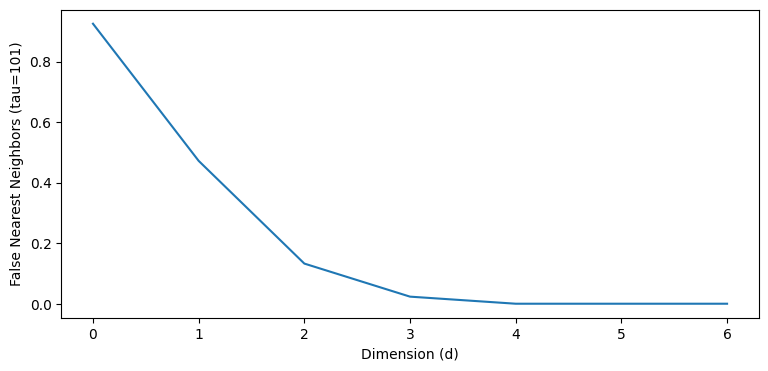

In [ ]:
dim = np.arange(1, 8)
f1, f2, f3 = dimension.fnn(df["NO3.4"], tau=17, dim=dim)

plt.figure(figsize=(9,4))
plt.xlabel('Dimension (d)')
plt.ylabel('False Nearest Neighbors (tau=101)')
plt.plot(f1)

In [ ]:
embedder_periodic = SingleTakensEmbedding(parameters_type="search",time_delay=max_periodic_time_delay,
    dimension=max_periodic_dimension)
y_periodic_embedded = embedder_periodic.fit_transform(df["NO3.4"])


print(f"Shape of embedded time series: {y_periodic_embedded.shape}")

pca = PCA(n_components=3)
y_periodic_embedded_pca = pca.fit_transform(y_periodic_embedded)
plot_point_cloud(y_periodic_embedded_pca)

Shape of embedded time series: (377, 8)


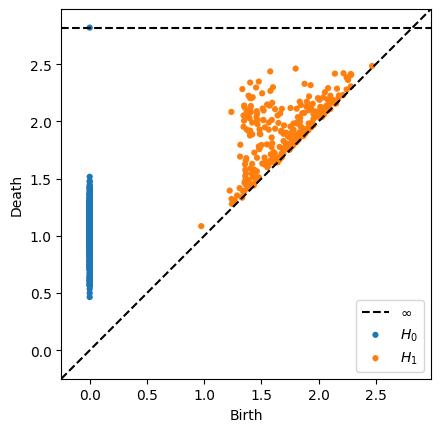

In [ ]:
ripsprueba=ripser.ripser(y_periodic_embedded)['dgms']
persim.plot_diagrams(ripsprueba,show=True)

In [ ]:
data1 = df[['ANOM.2','NO3.4']].to_numpy()

In [ ]:
data1[44, :]

array([-0.77, 25.99])

In [ ]:
mapper1 = km.KeplerMapper(verbose=1)
# La proyección sobre en las variables Número de viajes y tiempo de viajes
projected_data1 = mapper1.fit_transform(data1, projection=[0,1] ) 
covering=km.Cover(n_cubes=3,perc_overlap=0.3)
G1 = mapper1.map(projected_data1, data1, clusterer=sklearn.cluster.KMeans(n_clusters=3),cover=covering)

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (496, 2)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler()

Mapping on data shaped (496, 2) using lens shaped (496, 2)

Creating 9 hypercubes.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang


Created 40 edges and 21 nodes in 0:00:00.690365.


In [ ]:
mapper1.visualize(G1, 
                title='Performance Data based on Año and Niño3.4',
                node_color_function=np.array(['average','std','sum','max','min']))

km.jupyter.display("Niño3.4" + ".html")

Wrote visualization to: mapper_visualization_output.html


/usr/local/lib/python3.10/dist-packages/kmapper/visuals.py:344: RuntimeWarning:

invalid value encountered in long_scalars

/usr/local/lib/python3.10/dist-packages/kmapper/visuals.py:345: RuntimeWarning:

invalid value encountered in long_scalars



/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning:

Consider using IPython.display.IFrame instead



In [ ]:
max_periodic_dimension=22
max_periodic_time_delay=22
stride=1
tau,d= takens_embedding_optimal_parameters(df["NINO3"], max_periodic_dimension, max_periodic_time_delay, stride)
print('Optimal time delay: ', tau,'\nOptimal dimension: ', d)

Optimal time delay:  15 
Optimal dimension:  5


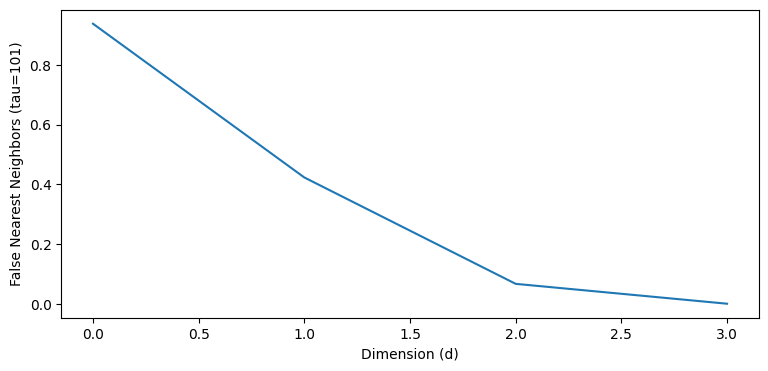

In [ ]:
dim = np.arange(1, 5)
f1, f2, f3 = dimension.fnn(df["NINO3"], tau=15, dim=dim)

plt.figure(figsize=(9,4))
plt.xlabel('Dimension (d)')
plt.ylabel('False Nearest Neighbors (tau=101)')
plt.plot(f1)

In [ ]:
embedder_periodic = SingleTakensEmbedding(parameters_type="search",time_delay=max_periodic_time_delay,
    dimension=max_periodic_dimension)
y_periodic_embedded2 = embedder_periodic.fit_transform(df["NINO3"])


print(f"Shape of embedded time series: {y_periodic_embedded.shape}")

pca = PCA(n_components=3)
y_periodic_embedded_pca = pca.fit_transform(y_periodic_embedded)
plot_point_cloud(y_periodic_embedded_pca)

Shape of embedded time series: (377, 8)


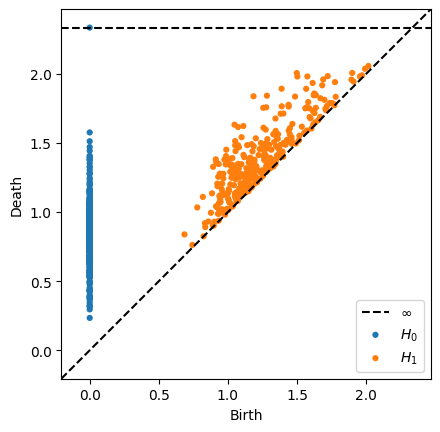

In [ ]:
ripsprueba=ripser.ripser(y_periodic_embedded2)['dgms']
persim.plot_diagrams(ripsprueba,show=True)